In [1]:
 # Data Import And Cleaning# We import the required libraries
import pandas as pd
import numpy as np
# we import visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('C:\\Users\\91955\\Desktop\\METABRIC_RNA_Mutation.csv')

C:\Users\91955\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4,Positve,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(1904, 693)

In [5]:
data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Finding the missing data and percentage of it in each column.
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total_NaN','Percent_Nan'])
missing_data.head(14)

,Total_NaN,Percent_Nan
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
cancer_type_detailed,15,0.007878


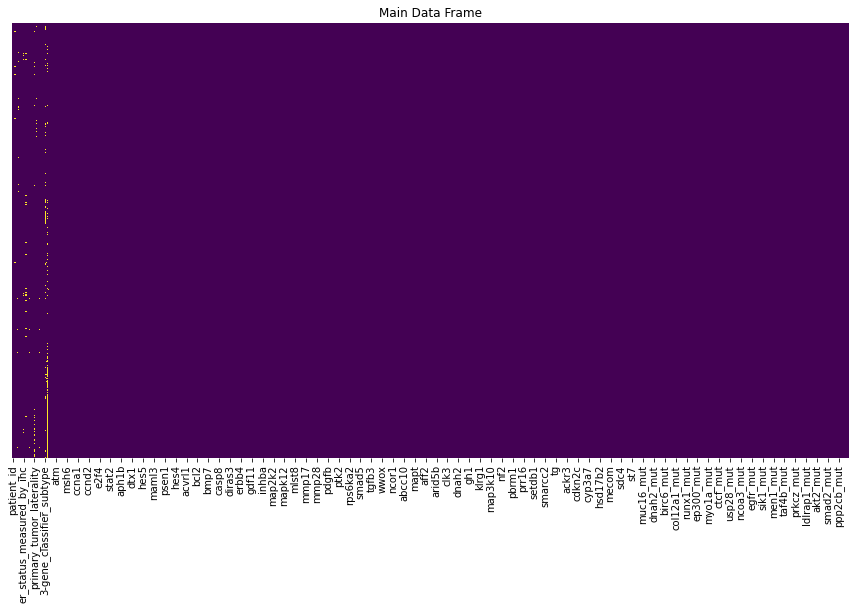

In [7]:
# visualization of missing data.
plt.subplots(figsize=(15,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Main Data Frame')
plt.show()

In [8]:
#help(sns.heatmap)

# Exploratary Data Analysis and Data visulization.

# a) Relation between clinical atributes and outcomes.

In [9]:
# Create a new data frame for clinical atributes only.
Clinical_features_to_drop=data.columns[31:]  # non-clinical data
Clinical_data=data.drop(Clinical_features_to_drop,axis=1)
Clinical_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [ ]:
#clinical attributes in the dataset:
Name:Type:Description
patient_id	object	Patient ID
age_at_diagnosis	float	Age of the patient at diagnosis time
type_of_breast_surgery	object	Breast cancer surgery type: 1- MASTECTOMY, which refers to a surgery to remove all breast tissue from a breast as a way to treat or prevent breast cancer. 2- BREAST CONSERVING, which refers to a urgery where only the part of the breast that has cancer is removed
cancer_type	object	Breast cancer types: 1- Breast Cancer or 2- Breast Sarcoma
cancer_type_detailed	object	Detailed Breast cancer types: 1- Breast Invasive Ductal Carcinoma 2- Breast Mixed Ductal and Lobular Carcinoma 3- Breast Invasive Lobular Carcinoma 4- Breast Invasive Mixed Mucinous Carcinoma 5- Metaplastic Breast Cancer
cellularity	object	Cancer cellularity post chemotherapy, which refers to the amount of tumor cells in the specimen and their arrangement into clusters
chemotherapy	int	Whether or not the patient had chemotherapy as a treatment (yes/no)
pam50_+_claudin-low_subtype	object	Pam 50: is a tumor profiling test that helps show whether some estrogen receptor-positive (ER-positive), HER2-negative breast cancers are likely to metastasize (when breast cancer spreads to other organs). The claudin-low breast cancer subtype is defined by gene expression characteristics, most prominently: Low expression of cell–cell adhesion genes, high expression of epithelial–mesenchymal transition (EMT) genes, and stem cell-like/less differentiated gene expression patterns
cohort	float	Cohort is a group of subjects who share a defining characteristic (It takes a value from 1 to 5)
er_status_measured_by_ihc	float	To assess if estrogen receptors are expressed on cancer cells by using immune-histochemistry (a dye used in pathology that targets specific antigen, if it is there, it will give a color, it is not there, the tissue on the slide will be colored) (positive/negative)
er_status	object	Cancer cells are positive or negative for estrogen receptors
neoplasm_histologic_grade	int	Determined by pathology by looking the nature of the cells, do they look aggressive or not (It takes a value from 1 to 3)
her2_status_measured_by_snp6	object	To assess if the cancer positive for HER2 or not by using advance molecular techniques (Type of next generation sequencing)
her2_status	object	Whether the cancer is positive or negative for HER2
tumor_other_histologic_subtype	object	Type of the cancer based on microscopic examination of the cancer tissue (It takes a value of 'Ductal/NST', 'Mixed', 'Lobular', 'Tubular/ cribriform', 'Mucinous', 'Medullary', 'Other', 'Metaplastic' )
hormone_therapy	int	Whether or not the patient had hormonal as a treatment (yes/no)
inferred_menopausal_state	object	Whether the patient is is post menopausal or not (post/pre)
integrative_cluster	object	Molecular subtype of the cancer based on some gene expression (It takes a value from '4ER+', '3', '9', '7', '4ER-', '5', '8', '10', '1', '2', '6')
primary_tumor_laterality	object	Whether it is involving the right breast or the left breast
lymph_nodes_examined_positive	float	To take samples of the lymph node during the surgery and see if there were involved by the cancer
mutation_count	float	Number of gene that has relevant mutations
nottingham_prognostic_index	float	It is used to determine prognosis following surgery for breast cancer. Its value is calculated using three pathological criteria: the size of the tumour; the number of involved lymph nodes; and the grade of the tumour.
oncotree_code	object	The OncoTree is an open-source ontology that was developed at Memorial Sloan Kettering Cancer Center (MSK) for standardizing cancer type diagnosis from a clinical perspective by assigning each diagnosis a unique OncoTree code.
overall_survival_months	float	Duration from the time of the intervention to death
overall_survival	object	Target variable wether the patient is alive of dead.
pr_status	object	Cancer cells are positive or negative for progesterone receptors
radio_therapy	int	Whether or not the patient had radio as a treatment (yes/no)
3-gene_classifier_subtype	object	Three Gene classifier subtype It takes a value from 'ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif','HER2+'
tumor_size	float	Tumor size measured by imaging techniques
tumor_stage	float	Stage of the cancer based on the involvement of surrounding structures, lymph nodes and distant spread
death_from_cancer	int	Wether the patient's death was due to cancer or not (yes/no)

In [10]:
Clinical_data.shape

(1904, 31)

In [11]:
Clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   int64  
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [12]:
# Here we find how many types of cancer are there in breast.
data['cancer_type'].value_counts()

Breast Cancer     1903
Breast Sarcoma       1
Name: cancer_type, dtype: int64

In [13]:
# Here we find how many types are there for breast surgery.
data['type_of_breast_surgery'].value_counts()

MASTECTOMY           1127
BREAST CONSERVING     755
Name: type_of_breast_surgery, dtype: int64

# 1. How many patients are died due to cancer and how many are living?

In [59]:
data['death_from_cancer'].value_counts()

Living                  801
Died of Disease         622
Died of Other Causes    480
Name: death_from_cancer, dtype: int64

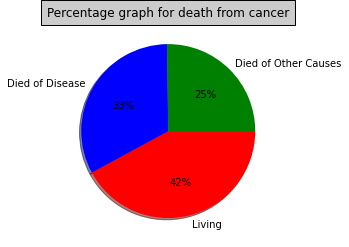

In [60]:
# pie graph for death_from_cancer.
values=[801,622,480]
color=['red','blue','green']
label=['Living','Died of Disease','Died of Other Causes']
plt.pie(values,colors=color,labels=label,autopct='%0.0f%%',shadow=True,counterclock=False)
plt.title('Percentage graph for death from cancer',bbox={'facecolor':'0.8','pad':6})
plt.show()

# comment : The living patients percentage is more.

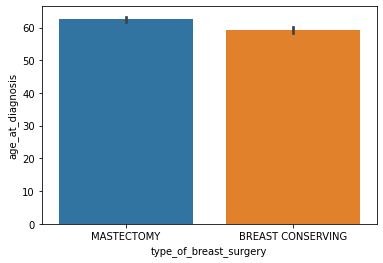

In [61]:
sns.barplot(x='type_of_breast_surgery',y='age_at_diagnosis',data=Clinical_data)
plt.show()

# comment: The MASTECTOMY surgery is done more and its recovery rate is also good.

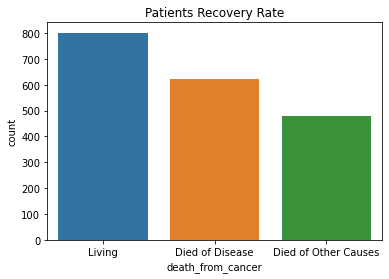

In [19]:
# Now we plot the graph for the patiebt who are living,died due to cancer and died because of another reasons.
sns.countplot(x='death_from_cancer',data=Clinical_data)
plt.title('Patients Recovery Rate')
plt.show()

# comment : The patients survived rate is more.

# 2. Now we do the comparision of overall survival rate at age at diagnosis.

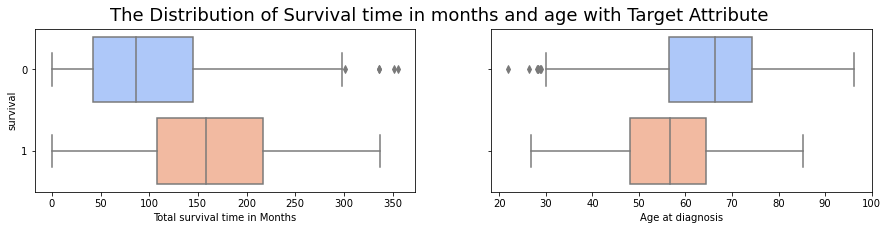

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

sns.boxplot(x='overall_survival_months', y='overall_survival', orient='h', data=Clinical_data, ax=ax[0], palette = 'coolwarm', saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=Clinical_data, ax=ax[1], palette = 'coolwarm', saturation=0.90)

fig.suptitle('The Distribution of Survival time in months and age with Target Attribute', fontsize = 18)

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis')
ax[1].set_ylabel('')

plt.show()


# Comment : To compare between the two classes of patients who survived and patients who did not, we can see the difference between the two distributions in age_at_diagnosis column, as patients who were younger when diagnosed with breast cancer were more likely to survive. 





# 3. What is relation between tumor size and tumor stages?

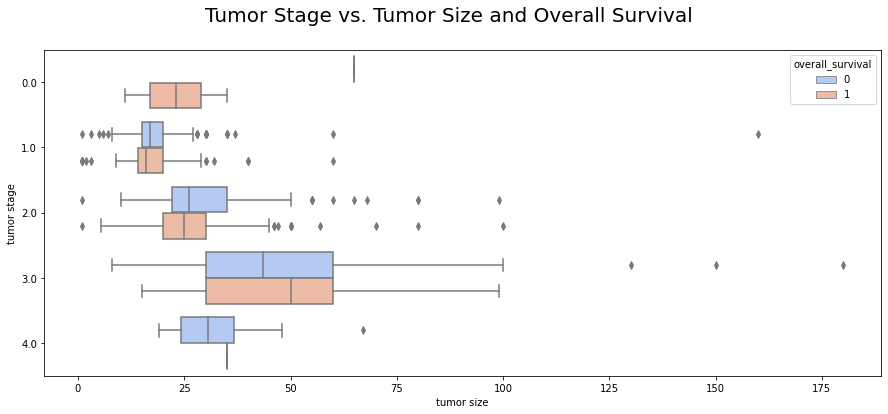

In [21]:
# For finding the relation between tumor size and tumor stage we plot the graph.
plt.subplots(figsize=(15,6))
sns.boxplot(x='tumor_size',y='tumor_stage',data=Clinical_data,orient='h',hue='overall_survival',palette='coolwarm')
plt.xlabel('tumor size')
plt.ylabel('tumor stage')
plt.suptitle('Tumor Stage vs. Tumor Size and Overall Survival',fontsize=20)
plt.show()

# comment : As the tumor size increases the tumor stage also increases. If the tumor stage is lower probability of survival is higher than the when paitient is in fourth stage of cancer.

# 4. When we do the treatment of theraphy on paitient what is the survival rate in each theraphy?

In [22]:
died = Clinical_data[Clinical_data['overall_survival']==0]
survived = Clinical_data[Clinical_data['overall_survival']==1]


In [23]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or li

C:\Users\91955\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='radio_therapy', ylabel='count'>

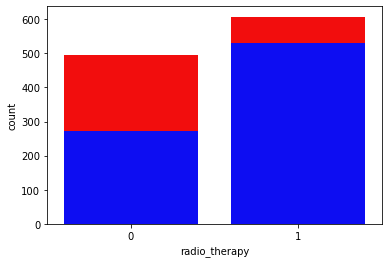

In [24]:
sns.countplot(died['radio_therapy'], color='red', label='Died', saturation=0.90)
sns.countplot(x=  survived['radio_therapy'], color='blue', label='Survived', saturation=0.90)

C:\Users\91955\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chemotherapy', ylabel='count'>

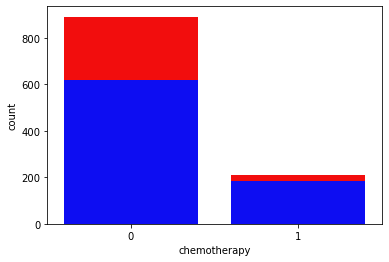

In [25]:
sns.countplot(died['chemotherapy'], color='red', label='Died',saturation=0.90)
sns.countplot(x= survived['chemotherapy'] , color='blue', label='Survived', saturation=0.90)


C:\Users\91955\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hormone_therapy', ylabel='count'>

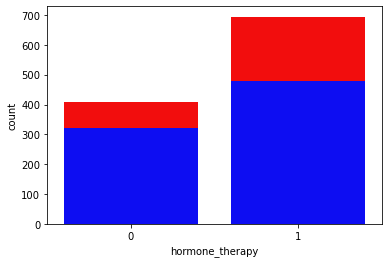

In [26]:
sns.countplot(died['hormone_therapy'], color='red', label='Died', saturation=0.90)
sns.countplot(x=  survived['hormone_therapy'], color='blue', label='Survived', saturation=0.90)


# comment : From this graph we say that in chemotherapy the survived rate is more than the other therapy.

# 5. What is the survived and died rating during the neoplasm_histologic_grade?

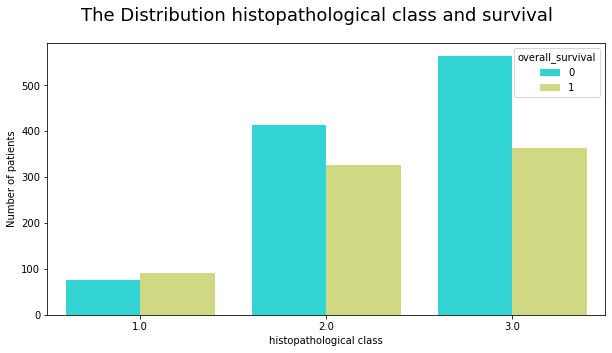

In [27]:
plt.subplots( figsize=(10,5))
plt.suptitle('The Distribution histopathological class and survival', fontsize = 18)


sns.countplot(x='neoplasm_histologic_grade', hue='overall_survival' ,data = Clinical_data, palette='rainbow' , saturation=0.9)

plt.xlabel('histopathological class')
plt.ylabel('Number of patients')

plt.show()

# comment : In third step of of pathology the survived rate is low as compare to other steps.

# 6. What is the ratio between death of cancer with overall survival and age at diagnosis?

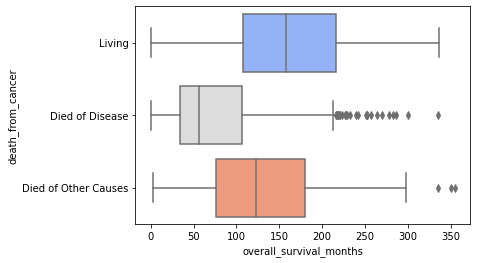

In [40]:
sns.boxplot(x='overall_survival_months', y='death_from_cancer', orient='h', data=Clinical_data,palette ='coolwarm', saturation=0.90)
plt.show()

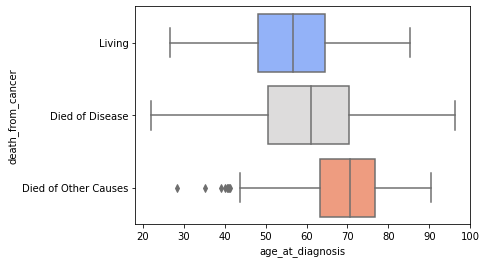

In [43]:
sns.boxplot(x='age_at_diagnosis', y='death_from_cancer', orient='h', data=Clinical_data, palette ='coolwarm', saturation=0.90)
plt.show()

# comment:The variable 'death_from_cancer' shows us if the patient is alive or died from cancer or its complications or died of other causes. From the distribution of the three classes, we can see that the median of the survival time in months of patients who died from breast cancer is low compared to the other two classes.

# Machine Learning

In [44]:
# split the data into target and input variables
X=Clinical_data[['chemotherapy','hormone_therapy','radio_therapy']]
Y=Clinical_data.overall_survival

In [45]:
# split as train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [47]:
y_pred=logreg.predict(X_test)

In [48]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[263,  21],
       [171,  21]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

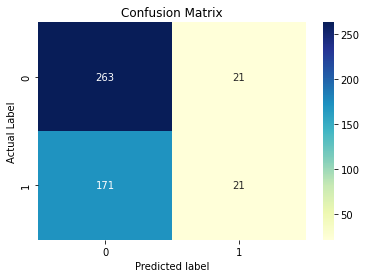

In [49]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')

In [50]:
print("Accuracy : ",metrics.accuracy_score(Y_test,y_pred))
# # print("Precision : ",metrics.precision_score(Y_test,y_pred))
# print("Recall : ",metrics.recall_score(Y_test,y_pred))

Accuracy :  0.5966386554621849


# conclusion:


# The number of paitients live or died due to cancer:
Living                  801

Died of Disease         622

Died of Other Causes    480

# The percentage for survived or dieing the paitients:
The living percentage rate is more than the other.

# Result for comparision of survival and age at diagnosis:
The younger is more survived durining the diagnosis.

# Relation between tumor size and tumor stage:
As the tumor size increases tumor stage also increases.

# Which therapy gives best result:
The chemotherapy gives the best result as compare to the others.

# Relation between survival and pathological lab :
when the third stage of pathology the survival rate is more.

# Accuracy for this data analysis :
59.66% accuracy is there for breast cancer data analysis.